#Installation of Pytorch
Pytorch binary can be installed by pip, or complied following instructions in https://github.com/pytorch/pytorch#from-source.

Here we will use pip.

In [13]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 
!pip3 install torchvision

#  Introducing Pytorch
Pytoch is composed by three parts: Tensors, Variable and Module.

For more detailed tutorial, refer to http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html.

##Tensors
They are like numpy arrays, you can do basic operations on them, like:

In [14]:
import numpy as np
import torch
print("For Tensors, we can just import torch")

a = torch.Tensor([1,2,3])
b = torch.Tensor([3,4,5])
print("This is some simple pytorch Tensors",a,b)

c = a+b

print("Simple sum result:",c)

a_np = a.numpy()
print("We can convert a pytorch Tensor into a numpy array:",a_np)

d = torch.from_numpy(a_np)
print("Also, we can convert a numpy array into a pytorch Tensor:",d)

For Tensors, we can just import torch
This is some simple pytorch Tensors 
 1
 2
 3
[torch.FloatTensor of size 3]
 
 3
 4
 5
[torch.FloatTensor of size 3]

Simple sum result: 
 4
 6
 8
[torch.FloatTensor of size 3]

We can convert a pytorch Tensor into a numpy array: [1. 2. 3.]
Also, we can convert a numpy array into a pytorch Tensor: 
 1
 2
 3
[torch.FloatTensor of size 3]



##Variable
For auto differentiation, we need another data structure to store Tensor's gradient and it's computation graph information.

>![Structure of Variable](http://pytorch.org/tutorials/_images/Variable.png)


In [15]:
from torch.autograd import Variable
print("For convenience, we import Variable from torch.autograd")

x = torch.ones(2,2)
X = Variable(x,requires_grad=True)
print("For a tenosr x:",x,"We wrap it in Variable to make it in a computation graph:",X)
print("We can still get the Tenosr inside Variable by .data",X.data)

Y=X+2

Z = Y*Y*3

out = Z.mean()

print("The result of a serial of computation is:",out,"Note that out is a Variable here")

out.backward()

print("By call backward method of Variable, every node in this computation get its gradient, for example, X's gradient is:",X.grad)

For convenience, we import Variable from torch.autograd
For a tenosr x: 
 1  1
 1  1
[torch.FloatTensor of size 2x2]
 We wrap it in Variable to make it in a computation graph: Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

We can still get the Tenosr inside Variable by .data 
 1  1
 1  1
[torch.FloatTensor of size 2x2]

The result of a serial of computation is: Variable containing:
 27
[torch.FloatTensor of size 1]
 Note that out is a Variable here
By call backward method of Variable, every node in this computation get its gradient, for example, X's gradient is: Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



## Module
To define a neural network, we need Module.

The following code define a CNN network as in this diagram
![CNN Network From Pytorch Tutorial](http://pytorch.org/tutorials/_images/mnist.png)

In [16]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d (1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)


Neural Networks can also be defined by ModuleList. 

For more detailed APIs, refer to http://pytorch.org/docs/master/nn.html?highlight=modulelist#torch.nn.ModuleList

The example following defines the same network as above.

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.nn_list = nn.ModuleList()
        self.nn_list.append(torch.nn.Sequential(
          nn.Conv2d(1, 6, 5),nn.Conv2d(6, 16, 5),nn.Linear(16 * 5 * 5, 120),
          nn.Linear(120, 84),nn.Linear(84, 10)))

    def forward(self, x):
      x = self.nn_list(x)
      return x
    
net = Net()
print(net)

Net(
  (nn_list): ModuleList(
    (0): Sequential(
      (0): Conv2d (1, 6, kernel_size=(5, 5), stride=(1, 1))
      (1): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
      (2): Linear(in_features=400, out_features=120)
      (3): Linear(in_features=120, out_features=84)
      (4): Linear(in_features=84, out_features=10)
    )
  )
)


# NICE Network

At each layer, input $y$ is divided into $y_0$ and $y_1$. And the transformation is as below:


\begin{equation}
\left\{
\begin{array}\\
y_0 = y_0+t(y_1) \\
y_1 = y_1
\end{array}
\right.
\end{equation}

Then, at each layer, the role of $y_0$ and $y_1$ is switched, so that every elements in input $y$ is altered.

##Define a NICE Network

In [0]:
class NICE(torch.nn.Module):

    def __init__(self, Nvars, Nlayers=2,Ht=10):
        super(NICE, self).__init__()
        self.Nvars = Nvars
        self.Nhalf = int(Nvars/2)
        self.Nlayers = Nlayers
        self.Ht = Ht

        self.name ='NICE'
        self.s = torch.nn.ModuleList()
        self.t = torch.nn.ModuleList()
        for i in range(self.Nlayers):
            self.t.append(
                 torch.nn.Sequential(
                 torch.nn.Linear(self.Nhalf, Ht),
                 torch.nn.ReLU(),
                 torch.nn.Linear(Ht, self.Nhalf)
                 ))

    def generate(self, x):
        y0 = x[:,0:self.Nhalf]
        y1 = x[:,self.Nhalf:self.Nvars]
        for i in range(self.Nlayers):
            if (i%2==0):
                y1 = y1 + self.t[i](y0)
            else:
                y0 = y0 +  self.t[i](y1)
        return torch.cat((y0, y1), 1)

    def inference(self, z):
        y0 = z[:,0:self.Nhalf]
        y1 = z[:,self.Nhalf:self.Nvars]
        for i in list(range(self.Nlayers))[::-1]:
            if (i%2==1):
                y0 = y0 - self.t[i](y1)
            else:
                y1 = y1 - self.t[i](y0)
        return torch.cat((y0, y1), 1)

    def logp(self, x):
        z = self.inference(x)
        return -0.5*(z**2).sum(dim=1)

##Reversibility Check

Because NICE network can generate samples of a complex distribution from simple distribution, and also can inference simple distribution from complex ditribution. So after implementing  NICE, we should check it's reversibility.

In [0]:
Nvars = 4
model = NICE(Nvars)
test = Variable(torch.randn(1000,Nvars))
generated = model.generate(test)
inferenced = model.inference(generated)
from numpy.testing import assert_array_almost_equal
assert_array_almost_equal(inferenced.data.numpy(),test.data.numpy())

##Training Network
First, let's load training data.

--2018-02-06 02:19:48--  https://pastebin.com/raw/JWgv53pd
Resolving pastebin.com (pastebin.com)... 104.20.208.21, 104.20.209.21
Connecting to pastebin.com (pastebin.com)|104.20.208.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘train.dat’

train.dat               [ <=>                ] 180.85K  --.-KB/s    in 0.05s   

2018-02-06 02:19:48 (3.69 MB/s) - ‘train.dat’ saved [185188]



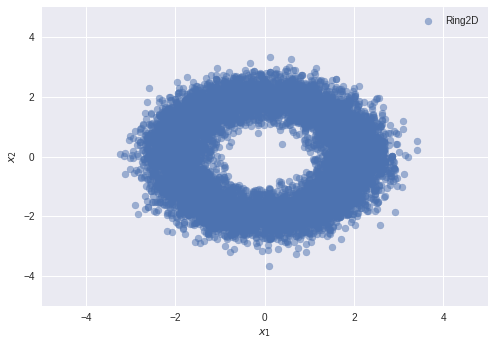

In [20]:
import matplotlib.pyplot as plt
!wget https://pastebin.com/raw/JWgv53pd -O train.dat
xy = np.loadtxt('./train.dat', dtype=np.float32)
x_data = Variable(torch.from_numpy(xy[:, :]))
Nvars = x_data.data.shape[-1]
plt.figure()
plt.scatter(x_data[:,0], x_data[:,1], alpha=0.5, label='Ring2D')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

We can see from above, we are going to fit a 2d ring using a gaussian distribution.

OK, let's define a NICE instance and an optimizer.

In [0]:
Nepochs = 800
Nlayers = 4
Ht = 10
model = NICE(Nvars, Nlayers,Ht)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.001)

Start training.

epoch: 0 loss: 2.927865505218506
epoch: 50 loss: 2.239636182785034
epoch: 100 loss: 2.2365105152130127
epoch: 150 loss: 2.232393741607666
epoch: 200 loss: 2.2048122882843018
epoch: 250 loss: 1.8594225645065308
epoch: 300 loss: 1.6859558820724487
epoch: 350 loss: 1.6317886114120483
epoch: 400 loss: 1.591546893119812
epoch: 450 loss: 1.5796477794647217
epoch: 500 loss: 1.5739452838897705
epoch: 550 loss: 1.570563554763794
epoch: 600 loss: 1.568166732788086
epoch: 650 loss: 1.5654830932617188
epoch: 700 loss: 1.562455654144287
epoch: 750 loss: 1.5598855018615723


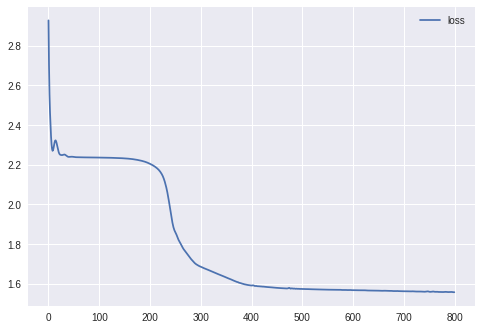

In [22]:
L = []
f = plt.figure()
ax = f.add_subplot(1,1,1)
for epoch in range(Nepochs):
    logp = model.logp(x_data)
    loss = -logp.mean()
    if epoch%50 == 0:
      print("epoch:",epoch,"loss:",loss.data[0])
    L.append(loss.data.numpy())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
ax.plot(range(len(L)),np.array(L),label = 'loss')
ax.legend()
plt.show()

Visualize training result.

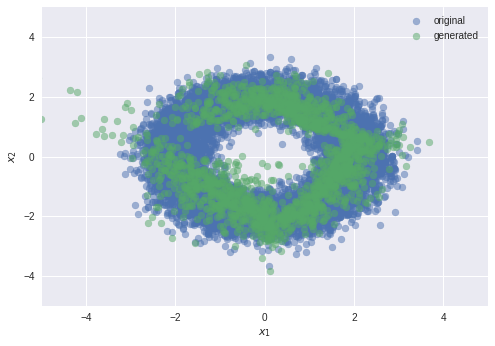

In [23]:
import matplotlib.pyplot as plt
Nsamples = 2000
z = Variable(torch.randn(Nsamples, Nvars), volatile=True)
x = model.generate(z)
plt.figure()
plt.scatter(x_data[:,0], x_data[:,1], alpha=0.5, label='original')
plt.scatter(x[:,0], x[:,1], alpha=0.5, label='generated')
plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

# Task
Now we have NICE network, we can also implement RealNVP network with only little changes.

The RealNVP's forumla is as following:

\begin{equation}
\left\{
\begin{array}\\
y_0 = y_0 * \exp(s(y_1))+t(y_1) \\
y_1 = y_1
\end{array}
\right.
\end{equation}

hint:

1.   You may have to come up with a way to store $log(jacobian)$ created along the way.
2.   Numerical stability should be considered.
